In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [4]:
def return_asset( data , focus_on ):
    return_data = {}
    for key in data[ focus_on ].columns:
        return_data[ key ] = []
        for run in range( 0 , data.shape[0] - 1 ):
            return_data[key].append( data[focus_on][ key ][run + 1 ] / 
                    data[ focus_on ][ key ][ run ] -1 )
    return return_data
                             
class portfolioDataFrame:
    def __init__( self , data , focus_on = "Adj Close"):
        self.data = data
        self.return_data = pd.DataFrame( 
                return_asset( self.data , focus_on ) )
        self.calculate_mean()
        self.calculate_corrcoef()
        self.prepare_data()
    
    def calculate_mean( self ):
        self.mean_dict = {}
        self.variance_dict = {}
        self.std_dict = {}
        for key in self.return_data.columns:
            temp = np.array( self.return_data[ key ].tolist() )
            self.mean_dict[key] = np.mean( temp )
            self.variance_dict[ key ] = np.var( temp )
            self.std_dict[ key ] = np.std( temp )
            
    def calculate_corrcoef( self ):
        temp = []
        for key in self.return_data.columns.tolist():
            temp.append( self.return_data[key].tolist() )
        self.corrcoef = np.corrcoef( np.array( temp ) )
        
    def prepare_data( self ):
        self.key = {};
        self.mean = []
        self.variance = []
        self.std = []
        run = 0
        for key in self.return_data.columns:
            run+=1
            self.key[ key ] = run
            self.mean.append( self.mean_dict[ key ] )
            self.variance.append( self.variance_dict[ key ] )
            self.std.append( self.std_dict[ key ] )

In [5]:
port_stock = "AMD CLF CSCO PFE USA"
port_key = set(port_stock.split( " " ))
data = yf.download( port_stock , start="2018-04-04", end="2019-04-04" )
data.fillna(method='bfill', inplace=True)
port_data = portfolioDataFrame( data )

[*********************100%***********************]  5 of 5 downloaded


In [16]:
data['Adj Close']

,AMD,CLF,CSCO,PFE,USA
Date,,,,,
2018-04-03,9.55,6.67,39.35,33.85,5.20
2018-04-04,9.77,6.65,39.49,34.27,5.26
2018-04-05,10.02,6.99,40.09,33.90,5.33
2018-04-06,9.61,6.65,39.04,33.36,5.20
2018-04-09,9.53,6.52,39.46,33.64,5.25
...,...,...,...,...,...
2019-03-28,25.06,9.48,52.30,41.53,5.77
2019-03-29,25.52,9.74,52.91,41.71,5.80
2019-04-01,26.36,10.12,53.88,42.07,5.87


ref01 : https://towardsdatascience.com/efficient-frontier-optimize-portfolio-with-scipy-57456428323e

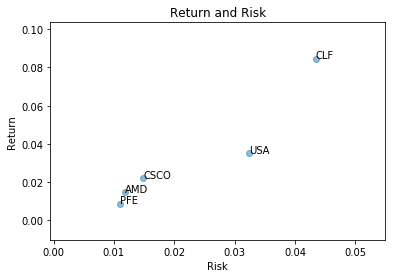

In [26]:
def get_risk(prices):
    return (prices / prices.shift(1) - 1).dropna().std().values
def get_return(prices):
    return ((prices / prices.shift(1) - 1).dropna().mean() * np.sqrt(250)).values

symbols = port_key

prices = data['Adj Close']
risk_v = get_risk(prices)
return_v = get_return(prices)
fig, ax = plt.subplots()
ax.scatter(x=risk_v, y=return_v, alpha=0.5)
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')
for i, symbol in enumerate(symbols):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
plt.show()

/home/sevinar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


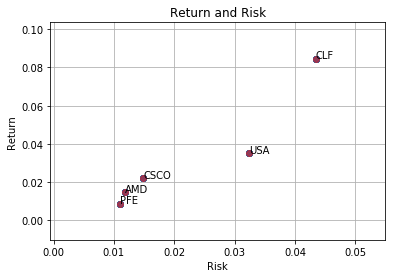

In [33]:
def random_weights(n):
    weights = np.random.rand(n)
    return weights / sum(weights)

def get_portfolio_risk(weights, normalized_prices):
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=normalized_prices.index, data={'portfolio': portfolio_val})
    return (portfolio / portfolio.shift(1) - 1).dropna().std().values[0]

def get_portfolio_return(weights, normalized_prices):
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=normalized_prices.index, data={'portfolio': portfolio_val})
    ret = get_return(portfolio)
    return ret[0]

risk_all = np.array([])
return_all = np.array([])
# for demo purpose, plot 3000 random portoflio
np.random.seed(0)
dfd.loc[dfd.index[[0, 2]], 'A']
normalized_prices = prices / prices.[0, :]
for _ in range(0, 3000):
    weights = random_weights(len(symbols))
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=prices.index, data={'portfolio': portfolio_val})
    risk = get_risk(portfolio)
    ret = get_return(portfolio)
    risk_all = np.append(risk_all, risk)
    return_all = np.append(return_all, ret)
    p = get_portfolio_risk(weights=weights, 
            normalized_prices=normalized_prices)
    
fig, ax = plt.subplots()
ax.scatter(x=risk_all, y=return_all, alpha=0.5)
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')
for i, symbol in enumerate(symbols):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
ax.scatter(x=risk_v, y=return_v, alpha=0.5, color='red')
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')
ax.grid()
plt.show()